

# This notebook takes all experimental images and uses only the blue channel to segment all cells, finding the position and shape of all cell nuclei.



* this first notebook cell will call all necessary python libraries



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter,morphology,label

from matplotlib.patches import Ellipse


from skimage.segmentation import watershed
from skimage.feature import peak_local_max

from skimage.measure import regionprops
from skimage import color
import skimage.filters

import os

%matplotlib inline


## As a test, this block takes one image only (for 24 h) to test if the segmentation is working

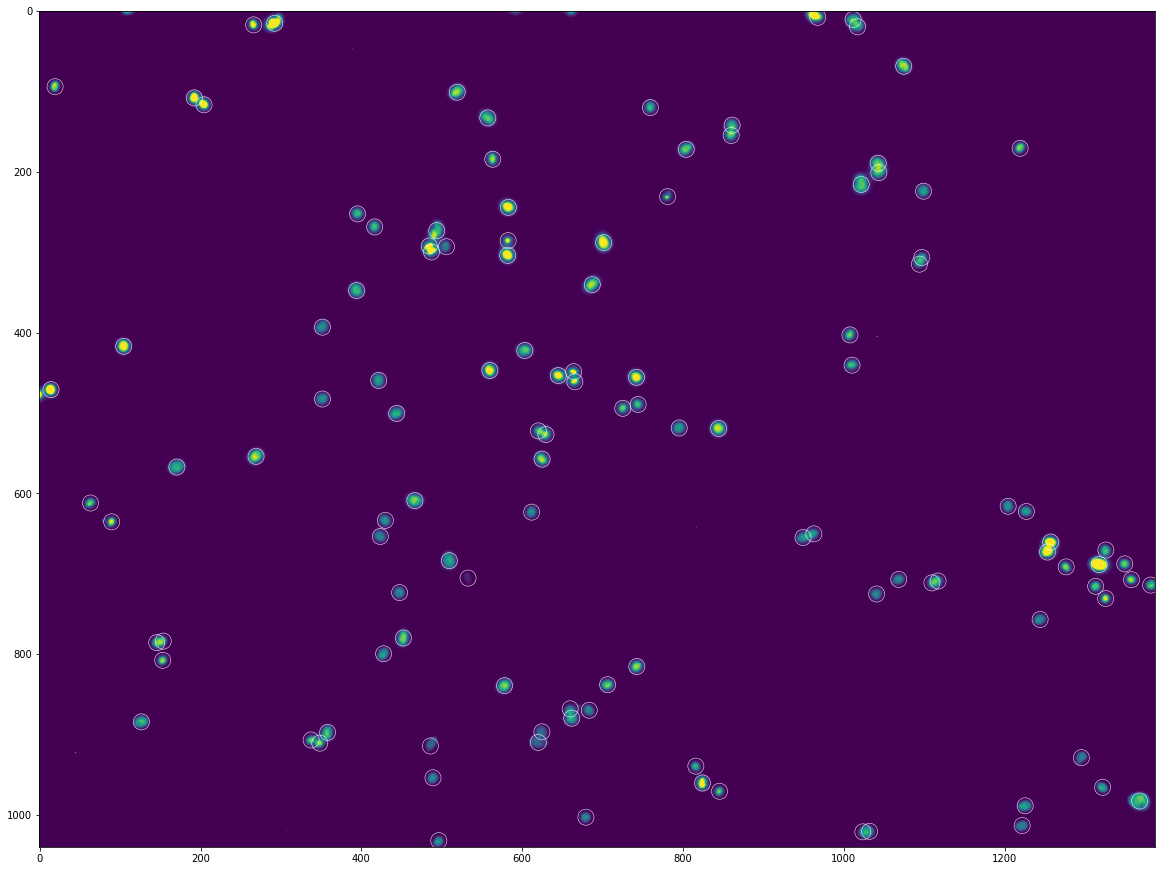

In [58]:
fig,ax = plt.subplots(figsize=(20,20))

img = plt.imread("images/24h-36_c1+2.tif") # reading one sample of 24 h


blue = img[:,:,2] # here we take only the blue channel


# The following lines will apply the watershed algorithm to segment the blue image. 

# First we apply a Gaussian filter, then a local threshold.

aux = gaussian_filter(blue, sigma=3)
aux=aux>skimage.filters.threshold_local(aux, 5, 'mean')
Dist = morphology.distance_transform_edt(aux)
local_maxi = peak_local_max(Dist, indices=False,min_distance=5,exclude_border=False)
neighbords=[[1,1,1],
            [1,1,1],
            [1,1,1]]


markers = label(local_maxi,structure=neighbords)[0]
labels = watershed(-Dist, markers,mask=aux)
props = regionprops(labels)


# Loop takes the result from the watershed and labeling to draw circles around the identified nuclei.

for i in range(len(props)):
    if props[i].filled_area>90.: # Threshold is to remove some image artifacts
        x,y=props[i].centroid
        circle1 = plt.Circle((y, x), 10., color='white',fill=False,lw=0.5)
        ax.add_artist(circle1)

ax.imshow(blue)

## If the segmentation works on the previous test, then you can move to run the next notebook cell which will loop over all experimental images and segment them.

In [ ]:
#Before run this you should create the folder /positions_cells/



horas_dict = {"24h":-1,"12h":-1,"8h":-1,"6h":-1,"4h":-1,"2h":-1}

files = os.listdir("images/")


# This loop will create a series of files containing the position of each nuclei and also a series of new images 
# with circles on top of the experimental images


for name in files:
    
    fig,ax = plt.subplots()
    
    hora=name.split("-")[0]
    
    horas_dict[hora]+=1
    
    outfile=open("positions_cells/hour_"+hora+"_samples_%s.dat"%horas_dict[hora],"w") 
    
    img = plt.imread("GBM_3/"+name)
    blue = img[:,:,2]
    aux = gaussian_filter(blue, sigma=3)
    aux=aux>skimage.filters.threshold_local(aux, 5, 'mean')
    Dist = morphology.distance_transform_edt(aux)
    local_maxi = peak_local_max(Dist, indices=False,min_distance=5,exclude_border=False)
    neighbords=[[1,1,1],
                [1,1,1],
                [1,1,1]]

    
    markers = label(local_maxi,structure=neighbords)[0]
    labels = watershed(-Dist, markers,mask=aux)
    props = regionprops(labels)
    print(hora,len(props))
    for i in range(len(props)):
        if props[i].filled_area>90.:
            x,y=props[i].centroid
            circle1 = plt.Circle((y, x), 10., color='white',fill=False,lw=0.5)
            ax.add_artist(circle1)
            print(x,y,file=outfile)
        
    ax.imshow(img)
    plt.savefig("fotos_circulos_GBM_3/"+name,dpi=300)
    plt.clf()




    